<a href="https://colab.research.google.com/github/HedersonSantos/Noticias/blob/main/preProcessamento/preProcessamentoFSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import io, re, os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

### Montando Google Driver e abrindo arquivos de noticias

o arquivo articles.csv contém 167053 noticias da Folha de São Paulo. Este dataset está disponível em .... <br>
O arquivo news.csv contém xxx noticias extraídos dos sites UOL, G1, GoogleNews, Poder360 através de web scrapping cujo algoritmo foi montado por nós.

In [4]:
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/nlp_tcc
path = '/gdrive/My Drive/Colab Notebooks'
KEY='4/1AX4XfWjO8LFULyUVA2hr76Ekj281Rn58ieVYw_BkgE4HYvy9Lf8PJ1W3aOQ'

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/nlp_tcc


In [ ]:

#!rm -R amostra_news_integrada


In [ ]:
#!unzip noticiasFSP.zip
!ls 

amostra_news_integrada	bertimbau_test	     noticia_tratada.csv
articles.csv		news.csv
bertimbau_base_results	news_integradas.csv


In [ ]:
!ls  -lh

total 1.2G
drwx------ 2 root root 4.0K Jul 31 20:13 amostra_news_integrada
-rw------- 1 root root 481M Jul 24 17:03 articles.csv
drwx------ 2 root root 4.0K Jul 31 17:49 bertimbau_base_results
drwx------ 2 root root 4.0K Jul 31 19:09 bertimbau_test
-rw------- 1 root root  900 Sep  3 00:20 mlp_v1.csv
-rw------- 1 root root  193 Sep  3 00:20 mlp_v1.scr
-rw------- 1 root root  93M Jul 24 15:58 news.csv
-rw------- 1 root root 521M Jul 25 22:30 news_integradas.csv
-rw------- 1 root root  93M Jul 24 15:42 noticia_tratada.csv


**Conjunto de Notícias da Folha de São Paulo**

In [ ]:
dfFSP = pd.read_csv('articles.csv', header=0)
print(dfFSP.columns)
dfFSP.shape

Index(['title', 'text', 'date', 'category', 'subcategory', 'link'], dtype='object')


(167053, 6)

In [ ]:
dfFSP.head(1)

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem força como cabo eleitoral","Com a possibilidade de uma condenação impedir sua candidatura em 2018, o ex-presidente Luiz Inácio Lula da Silva fez, nesta segunda (9), um discurso inflamado contra a Lava Jato, no qual disse saber que está ""lascado"", exigiu um pedido de desculpas do juiz Sergio Moro e afirmou que, mesmo fora da disputa pelo Planalto, será um cabo eleitoral expressivo para a sucessão de Michel Temer. Segundo o petista, réu em sete ações penais, o objetivo de Moro é impedir sua candidatura no ano que vem, desidratando-o, inclusive, no apoio a um nome alternativo, como o do ex-prefeito de São Paulo Fernando Haddad (PT), caso ele não possa concorrer à Presidência. ""Eu sei que tô lascado, todo dia tem um processo. Eu não quero nem que Moro me absolva, eu só quero que ele peça desculpas"", disse Lula durante um seminário sobre educação em Brasília. ""Eles [investigadores] chegam a dizer: 'Ah, se o Lula não for candidato, ele não vai ter força como cabo eleitoral'. Testem"", completou o petista. Para o ex-presidente, Moro usou ""mentiras contadas pela Polícia Federal e pelo Ministério Público"" para julgá-lo e condená-lo a nove anos e seis meses de prisão pelo caso do tríplex em Guarujá (SP). O ex-presidente disse ainda não ter ""medo"" dos investigadores que, de acordo com ele, estão acostumados a ""mexer com deputados e senadores"" que temem as apurações. ""Eu quero que eles saibam o seguinte: se eles estão acostumados a lidar com deputado que tem medo deles, a mexer com senadores que têm medo deles, quero dizer que tenho respeito profundo por quem me respeita, pelas leis que nós ajudamos a criar, mas não tenho respeito por quem não me respeita e eles não me respeitaram"", afirmou o petista. De acordo com aliados, Lula não gosta de discutir, mesmo que nos bastidores, a chance de não ser candidato ao Planalto e a projeção do nome de Haddad como plano B do PT tem incomodado os mais próximos ao ex-presidente. O ex-prefeito, que estava no evento nesta segunda, fez um discurso rápido, de menos de dez minutos, em que encerrou dizendo esperar que Lula assuma a Presidência em 2019. ""Espero que dia 1º de janeiro de 2019 esse pesadelo chamado Temer acabe e o senhor assuma a Presidência da República"", disse Haddad. 'DEMÔNIO DO MERCADO' Lula voltou a fazer um discurso mais agressivo em relação ao mercado e disse que ""não tem cara de demônio"", mas quer que o respeitem ""como se fosse"". ""Não tenho cara de demônio, mas quero que eles me respeitem como se eu fosse, porque eles sabem que a economia não vai ficar subordinada ao elitismo da sociedade brasileira"", disse o ex-presidente. O petista rivalizou ainda com o deputado Jair Bolsonaro (PSC-RJ), segundo colocado nas últimas pesquisas empatado com Marina Silva, e disse que se ele ""agrada ao mercado"", o PT tem que ""desagradar"". A Folha publicou nesta segunda (9) reportagem em que mostrou que o deputado ensaia movimento ao centro no debate econômico, adotando um discurso simpático aos investidores do mercado financeiro.",2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/1925743-lula-diz-que-esta-lascado-mas-que-ainda-tem-forca-como-cabo-eleitoral.shtml


**Quantidade de noticias por categoria**

In [ ]:
#['title', 'text', 'date', 'category', 'subcategory', 'link'
categoriaFSP = dfFSP.groupby(['category'])['link'].count().reset_index().sort_values(by = 'link', ascending=False)
categoriaFSP

,category,link
35,poder,22022
9,colunas,21622
26,mercado,20970
18,esporte,19730
29,mundo,17130
12,cotidiano,16967
23,ilustrada,16345
33,opiniao,4525
34,paineldoleitor,4011
37,saopaulo,3955


**Conjunto de Notícias da nossa base de dados**

In [ ]:
dfNews = pd.read_csv('news.csv', header=0)
print(dfNews.columns)
dfNews.shape

Index(['FONTE', 'CATEGORIA', 'TEXTO', 'URL', 'PUBLISHEDAT', 'TITLE', 'AUTHOR',
       'DT_REGISTRO', 'TEXT_TRATADO'],
      dtype='object')


(11176, 9)

In [ ]:
'''tornando o nome das colunas dos dois datasets iguais '''
dfNews = dfNews.rename(columns={'CATEGORIA':'category',
                       'URL':'link',
                       'PUBLISHEDAT':'date',
                       'TITLE':'title',
                       'TEXT_TRATADO':'text',
                       'FONTE':'fonte'}).copy()
dfNews = dfNews[['title', 'text', 'date', 'category', 'link','fonte']]


    

In [ ]:
dfNews.head(1)

,title,text,date,category,link,fonte
0,"Putin não espera ""grandes avanços"" em cúpula com Biden","Em entrevista para as principais agências de notícias internacionais, incluindo a Efe, Putin enfatizou que os dois países, apesar das discordâncias, têm interesses em comum e que ele está confiante que a cúpula com Biden será construtiva.\nEntre as áreas de interesse comum, o chefe do Kremlin citou a solução de problemas ambientais, segurança estratégica e a dissolução de uma série de crises regionais.\n""Isso é muito importante, porque tem a ver com a segurança de nossos países"", afirmou Putin, além de destacar, por exemplo, que a crise no Oriente Médio ""leva ao crescimento do terrorismo"".\n""(Isso é) muito perigoso para todos, para os Estados Unidos, para a Rússia, para a Europa, para outras regiões do mundo"", acrescentou.\nPutin enfatizou a importância da segurança estratégica e garantiu que a Rússia não quer ""assustar ninguém"" com seus novos armamentos.\n""Sim, estamos desenvolvendo esses armamentos e conseguimos certos resultados"", disse o mandatário, para quem a Rússia está um passo ""à frente"" de outros países.\nEle também admitiu que os Estados Unidos e outras potências logo alcançarão resultados semelhantes, e portanto ""é melhor pensar em como vamos viver juntos"".\n\nO Conselho Tutelar de\nIvaiporã foi acionado por volta das 12h30 de sexta-feira (4) para acompanhar\nalgumas...\nO sábado (5) começa com tempo estável nas regiões paranaenses. Ao amanhecer, Apucarana e Arapongas registraram...\nO Senado vai analisar a Medida Provisória 1.034/2021, que aumenta a tributação de instituições financeiras O texto \nEm meio à pandemia da Covid-19, especialistas apontam que a menor frequência nos parques públicos pode estar...\nA Empresa de Limpeza Urbana de Salvador (Limpurb) fará uma série de ações até 11 de junho como parte da campanha...\nOs ministros das Finanças do G7 esperam anunciar um acordo neste sábado (5) sobre um imposto mínimo global e uma...",2021-06-05T03:00:00Z,mundo,https://noticias.uol.com.br/ultimas-noticias/efe/2021/06/05/putin-nao-espera-grandes-avancos-em-cupula-com-biden.htm,UOL


In [ ]:
categoriaNossa = dfNews.groupby(['category'])['link'].count().reset_index().sort_values(by = 'link', ascending=False)

### Integrando as duas bases de dados de noticias

In [ ]:
dfFSP['fonte']='FolhaSP'
dfnoticias = pd.concat([dfFSP,dfNews],sort=False)
dfnoticias.shape

(178229, 7)

In [ ]:
dfnoticias['fonte'].value_counts()

FolhaSP           167053
UOL                 4034
google-news-br      2089
Poder360            1448
Notícias da TV      1262
Name: fonte, dtype: int64

In [ ]:
deParaCategorias = pd.merge(categoriaFSP[['category','link']], categoriaNossa, on=['category'], how='outer')

**Categorias com mesmo nome nos dois conjunto de dados**

In [ ]:
deParaCategorias[(~deParaCategorias['link_x'].isnull()) & (~deParaCategorias['link_y'].isnull()) ]

,category,link_x,link_y
1,colunas,21622.0,263.0
3,esporte,19730.0,590.0
4,mundo,17130.0,1251.0
5,cotidiano,16967.0,77.0
12,educacao,2118.0,27.0


**Categorias que estão no nosso dataset e não estão no dataset da FSP**

In [ ]:
str(deParaCategorias[(deParaCategorias['link_x'].isnull()) ]['category'].tolist())

"['midia', 'local', 'politica', 'novelas', 'miscelanea', 'saude', 'economia', 'brasil', 'coronavirus', 'justica', 'celebridades', 'tecnologia', 'fantastico', 'meio-ambiente', 'podcast', 'eleicoes', 'loterias', 'casos-de-policia', 'olimpiadas', 'pesquisas', 'confere', 'enem', 'carros', 'agronegocios', 'pme', 'mais', 'tilt, reuters', 'portuguese', 'legislacao', 'atitude', 'internet', 'coluna', 'especiais', 'start', 'sociedade, educacao', 'realities', 'programas, 3-em-1', 'comprova', 'pix', 'combate', 'transito', 'nieman', 'motor', 'inovacao', 'historia', 'nossa', 'carros, colunas', 'boxe', 'tilt, estado', 'brics', 'mais, levante', 'sociedade, epoca', 'saude, estado', 'eurocopa', 'rio, rio', 'golfe', 'programas', 'carros, colunas, infomoto', 'justica, 3-dos-ex-pms-levados-por-salles-para-ministerio-foram-afastados-pelo-stf', 'exercito', 'diplomacia', 'redacao']"

In [ ]:
str(categoriaFSP['category'].tolist())

"['poder', 'colunas', 'mercado', 'esporte', 'mundo', 'cotidiano', 'ilustrada', 'opiniao', 'paineldoleitor', 'saopaulo', 'tec', 'tv', 'educacao', 'turismo', 'ilustrissima', 'ciencia', 'equilibrioesaude', 'sobretudo', 'bbc', 'folhinha', 'empreendedorsocial', 'comida', 'asmais', 'ambiente', 'seminariosfolha', 'serafina', 'o-melhor-de-sao-paulo', 'vice', 'guia-de-livros-discos-filmes', 'topofmind', 'banco-de-dados', 'dw', 'especial', 'infograficos', 'cenarios-2017', 'rfi', 'guia-de-livros-filmes-discos', 'multimidia', 'treinamento', 'treinamentocienciaesaude', 'mulher', 'euronews', 'ombudsman', 'contas-de-casa', '2016', 'bichos', 'musica', '2015']"

DE/PARA de categorias.

nossa             FSP<br>
midia      <--    tv, multimidia, novelas, celebridades   <br>
local      <--    'saopaulo', 'o-melhor-de-sao-paulo' <br>
politica      <--    poder <br>
miscelanea -->     <br>
saude      <--   equilibrioesaude <br>
economia   <--   mercado <br>
brasil                   <br>
olimpiadas -->  esporte <br>
tecnologia  <-- tec,'banco-de-dados', 'dw'  <br>
meio-ambiente <-- ambiente <br>
enem --> educacao








In [ ]:
dfnoticias['category'] = dfnoticias.loc[:,['category']].apply(lambda x: 'midia' if x['category'] in ['tv', 'multimidia', 'novelas', 'celebridades'] else 
                                                                        'local' if x['category'] in [ 'saopaulo', 'o-melhor-de-sao-paulo'] else 
                                                                        'politica' if x['category'] in ['poder'] else
                                                                        'saude' if x['category'] in ['equilibrioesaude'] else 
                                                                        'economia' if x['category'] in ['mercado'] else
                                                                        'esporte' if x['category'] in ['olimpiadas'] else
                                                                        'tecnologia' if x['category'] in [ 'tec','banco-de-dados', 'dw'] else
                                                                        'meio-ambiente' if x['category'] in [ 'ambiente'] else 
                                                                        'educacao' if x['category'] in ['enem'] else
                                                                        x['category'], axis=1)


**Quantitativo de noticias por categoria**

In [ ]:
dfnoticias['category'].value_counts()

politica                                                                             23499
colunas                                                                              21885
economia                                                                             21476
esporte                                                                              20331
mundo                                                                                18381
cotidiano                                                                            17044
ilustrada                                                                            16345
local                                                                                 5628
midia                                                                                 4817
opiniao                                                                               4525
paineldoleitor                                                                        4011

Limpeza em Textos extraídos pela nossa rotina de Web Scrapping
Foram retirados primeiros paragráfos duplicados - ocorrência referente à fonte google-news-br -, textos de chamadas a outras noticias e chamadas a vídeos de outras reportagens no Youtube - ocorrências referentes à fonte UOL.   

In [ ]:
class preprocessamento():
  def limpaReferenciaOutrasNoticiasApos2enters(self,dfnews,fonte):
    '''extrai links de outras noticias no texto da noticial principal do uol. Considera quando inicia com dois enters'''
    for index, row in dfnews[dfnews['fonte']==fonte][['fonte','category','text','link']].iterrows():
      if '...' in str(row['text']):
        for match in re.finditer(r'(?s)((?:[^\n][\n]?)+)', row['text']):
          if not ('...' in str(row['text'])[match.start(): match.end()]):
            dfnews.loc[dfnews['link']==row['link'],['text']]=row['text'][match.start(): match.end()]
    return dfnews
  def limpaReferenciaOutrasNoticiasApos1enter(self,dfnews,fonte):
    '''extraindo links de outras noticias no texto da noticial principal do uol. obtem paragrafo por paragrafo e verifica se nele tem ...'''
    for index, row in dfnews[dfnews['fonte']==fonte].iterrows():
      if '...' in str(row['text']):
        texto=''
        for match in re.finditer(r'((?:[^\n][\.]?)+)', row['text']):
          if not ('...' in str(row['text'])[match.start(): match.end()]):
            texto+=str(row['text'])[match.start(): match.end()] + '\n'
          else:  
            break
        dfnews.loc[dfnews['link']==row['link'],['text']]=texto
    return dfnews

  def limpaReferenciaVideosYoutubeSemContexto(self,dfnews,fonte):
    '''retira do final do texto referências a Youtube '''
    for index, row in dfnews[(dfnews['fonte']=='UOL')&(dfnews['text'].str.contains('Já assistiu aos nossos novos vídeos no YouTube'))].iterrows():
      for match in re.finditer(r'(Leia outras reportagens da série aqui)|(Já assistiu aos nossos novos vídeos no YouTube)', row['text']):
        dfnews.loc[dfnews['link']==row['link'],['text']]=str(row['text'])[0: match.start()]
        break
    return dfnews
  def limpaParagrafosDuplicados(self,dfnews,fonte):
    '''excluindo primeiro paragráfo duplicado '''
    for index, row in dfnews[dfnews['fonte']==fonte].iterrows():
      texto=''
      texto_anterior=''
      for match in re.finditer(r'((?:[^\n][\.]?)+)', row['text']):
        if (row['text'][match.start():match.end()])!=(texto_anterior):
          texto+=row['text'][match.start():match.end()]+'\n'
          texto_anterior=row['text'][match.start():match.end()]
      dfnews.loc[dfnews['link']==row['link'],['text']]=texto
      return dfnews
  def numerandoCategorias(self,dfnews):
    dfNewsGrupo = dfnews.groupby(['category'])['link'].count().reset_index().sort_values('link',ascending=False)
    dictCategoriaNumero = dict(zip(dfNewsGrupo['category'],range(0,dfNewsGrupo.shape[0])))
    dfnews['category_nro'] = dfnews['category'].map(dictCategoriaNumero)
    return dfnews








In [ ]:
pp=preprocessamento()
dfnews_tratadas = dfnoticias.copy()
dfnews_tratadas=pp.limpaReferenciaOutrasNoticiasApos2enters(dfnews_tratadas,'UOL')
dfnews_tratadas=pp.limpaReferenciaOutrasNoticiasApos1enter(dfnews_tratadas,'UOL')  
dfnews_tratadas=pp.limpaReferenciaVideosYoutubeSemContexto(dfnews_tratadas,'UOL')
dfnews_tratadas=pp.limpaParagrafosDuplicados(dfnews_tratadas,'google-news-br')
dfnews_tratadas=pp.numerandoCategorias(dfnews_tratadas)

In [ ]:
dfnews_tratadas.to_csv("news_integradas.csv",header=True,doublequote=True, index=False, quotechar='"', encoding='utf-8')
#Este arquivo está no drive google hederson.santos@gmail.com

In [ ]:
#!!unzip news_integradas.zip

Archive:  news_integradas.zip
  inflating: news_integradas.csv     


In [5]:
dfnews_tratadas = pd.read_csv("./news_integradas.csv",header=0,doublequote=True, quotechar='"', encoding='utf-8')
print(dfnews_tratadas.shape)

(178229, 8)


In [7]:
dfnews_tratadas = dfnews_tratadas[~dfnews_tratadas['text'].isnull()]
print(dfnews_tratadas.shape)

(177407, 8)


In [ ]:
areas = ['politica', 'economia', 'esporte', 'mundo', 'ilustrada', 'midia', 'tecnologia', 'educacao', 'saude', 'ciencia']
dictCod = {}
for i, a in enumerate(areas):
  dictCod[a]=i 
dfCodigos = pd.DataFrame([dictCod]).T.reset_index().rename(columns={0:'category_nro', 'index':'category'})
dfnews_tratadas = dfnews_tratadas[dfnews_tratadas['category'].isin(areas)]
dfnews_tratadas = pd.merge(dfnews_tratadas[['text','category','link']],
                           dfCodigos,
                           on = ['category'], how='inner')


In [45]:
dfnews_tratadas.shape


(177407, 8)

In [46]:
dfNewsGrupo = dfnews_tratadas.groupby(['category','category_nro'])['link'].count().reset_index().sort_values(by='link',ascending=False).reset_index().rename(columns={'link':'qtd_registros'})
dfNewsGrupo

,index,category,category_nro,qtd_registros
0,66,politica,0,23499
1,15,colunas,1,21881
2,23,economia,2,21476
3,29,esporte,3,20327
4,56,mundo,4,18380
5,21,cotidiano,5,17044
6,39,ilustrada,6,15617
7,47,local,7,5628
8,52,midia,8,4797
9,60,opiniao,9,4525


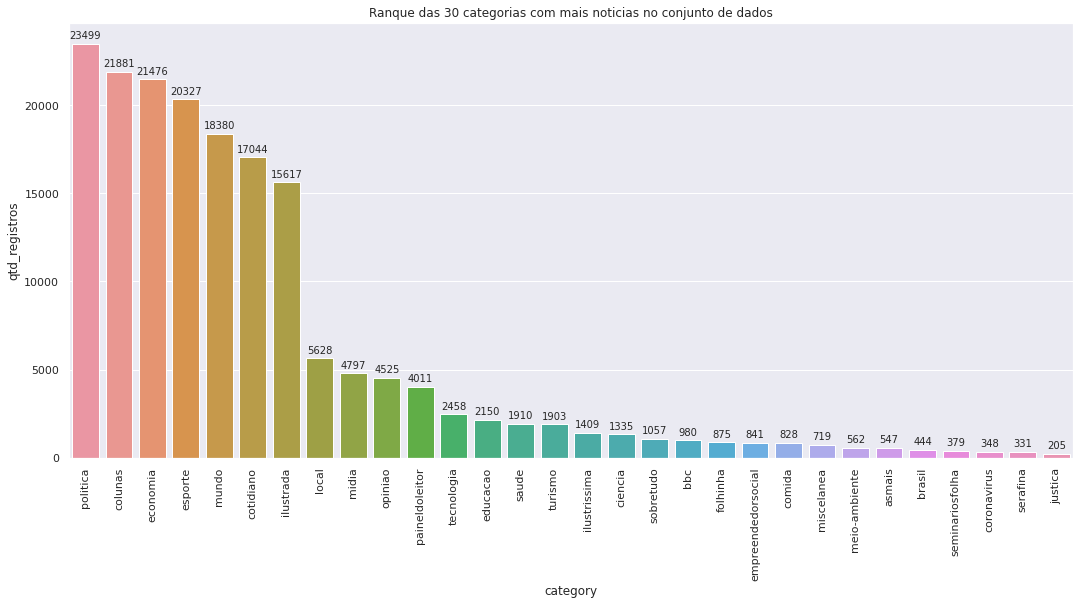

In [44]:
dfGraph = dfNewsGrupo[['category','qtd_registros']].head(30).copy()
fig, ax =plt.subplots(figsize=(18, 8), sharex=True)
sns.barplot(x='category',y='qtd_registros', data=dfGraph,orient='v', ax = ax).set_title("Ranque das 30 categorias com mais noticias no conjunto de dados")
for bar in ax.patches:
  ax.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
for item in ax.get_xticklabels():
    item.set_rotation(90)


In [51]:
dfNewsGrupo.loc[0:6,['qtd_registros']].sum()/dfNewsGrupo.loc[: As,['qtd_registros']].sum()


qtd_registros    0.779135
dtype: float64

In [ ]:
def gravaArquivos(dfAmostra, caminho):
  df_train, df_test_valid = train_test_split(dfAmostra, train_size = 0.8, random_state = 10)
  df_valid, df_test = train_test_split(df_test_valid, train_size = 0.5, random_state = 10)
  print('Treinamento:',df_train.shape)
  print('Teste:', df_test.shape)
  print('Valid:', df_valid.shape)
  df_train.to_csv(caminho + '/train.csv',header=True,doublequote=True, index=False, quotechar='"', encoding='utf-8')
  df_test.to_csv(caminho + '/test.csv',header=True,doublequote=True, index=False, quotechar='"', encoding='utf-8')
  df_valid.to_csv(caminho + '/valid.csv',header=True,doublequote=True, index=False, quotechar='"', encoding='utf-8')
def gravaArquivoUnico(dfAmostra, caminho):
  print('Dimensao:',dfAmostra.shape)
  os.makedirs(caminho,exist_ok=True )
  dfAmostra.to_csv(caminho + '/amostra.csv',header=True,doublequote=True, index=False, quotechar='"', encoding='utf-8')
  

In [ ]:
n_registros=[[2000,30000],[1910,2000],[1335,1400]]  #considerar categorias com quantidade de registros acima desta. Se zero considerar toda a amostra.
tam_amostra =[2000,1910,1335]  #tamanho da amostra a ser selecionada em cada categoria. Se zero, pega toda a quantidade da categoria.
quantidade = True #determina se obtem uma fração ou uma quantidade de cada categoria. Se False obtem a fraçao.
idx=5 #nro do dataset
arquivoUnico = True # Se False faz o split em Treinamento, Validacao e Teste
colunas = ['text','category_nro']
for registro, amostra in zip(n_registros, tam_amostra):
  categorias = dfNewsGrupo[(dfNewsGrupo['qtd_registros']>=registro[0]) & (dfNewsGrupo['qtd_registros']<registro[1]) ].loc[:,['category']]['category'].to_list()
  print('qtd_categorias:',len(categorias))
  frame=[]
  if registro[0]>0:
    for categoria in categorias:
      if amostra==0:
        dftmp = dfNewsGrupo[dfNewsGrupo['category']==categoria]
        amostra_l = dftmp['qtd_registros'].tolist()[0]-1
        quantidade=True
      else:
        amostra_l = amostra
      if quantidade==True:
        dftmp = dfnews_tratadas[dfnews_tratadas['category']==categoria].loc[:,colunas].sample(n=amostra_l, random_state=42)
      else:
        dftmp = dfnews_tratadas[dfnews_tratadas['category']==categoria].loc[:,colunas].sample(frac=amostra_l, random_state=42)
      frame.append(dftmp)
    dfAmostra = pd.concat(frame,ignore_index=True, sort=False)
  else:
    if quantidade==True:
      dfAmostra = dfnews_tratadas.loc[:,colunas].sample(n=amostra, random_state=42) #usar pesos????
    else:
      dfAmostra = dfnews_tratadas.loc[:,colunas].sample(frac=amostra, random_state=42) #usar pesos????
  if not dfAmostra.empty:
    if not arquivoUnico == True:
      gravaArquivos(dfAmostra,'./amostra_news_integrada/amostra_'+str(idx))
    else:
      gravaArquivoUnico(dfAmostra,'./amostra_news_integrada/amostra_'+str(idx))
    print('Amostra', idx,':', dfAmostra.shape)
  else:
    print('Amostra ',idx,' não gerada.')
  idx+=1


qtd_categorias: 8
Dimensao: (16000, 2)
Amostra 5 : (16000, 2)
qtd_categorias: 1
Dimensao: (1910, 2)
Amostra 6 : (1910, 2)
qtd_categorias: 1
Dimensao: (1335, 2)
Amostra 7 : (1335, 2)


In [ ]:
df5 = pd.read_csv('./amostra_news_integrada/amostra_5/amostra.csv')
df6 = pd.read_csv('./amostra_news_integrada/amostra_6/amostra.csv')
df7 = pd.read_csv('./amostra_news_integrada/amostra_7/amostra.csv')
print(df5.shape, df6.shape, df7.shape)
dfT = pd.concat([df5, df6, df7], sort=False)


In [ ]:
gravaArquivos(dfT,'./amostra_news_integrada/amostra_5')

Treinamento: (15396, 2)
Teste: (1925, 2)
Valid: (1924, 2)


In [ ]:
#amostra para treinar ulmfit
df_ulmfit = dfnews_tratadas[['text','category_nro']].sample(frac=0.5, random_state=42)

In [ ]:
dfTreino = pd.read_csv('./amostra_news_integrada/amostra_5/train.csv')
dfTeste = pd.read_csv('./amostra_news_integrada/amostra_5/test.csv')
dfValid = pd.read_csv('./amostra_news_integrada/amostra_5/valid.csv')
dfT = pd.concat([dfTreino, dfTeste, dfValid], sort=False).rename(columns={'category_rno':'categoria'})


In [ ]:
dfx = pd.merge(df_ulmfit, dfT, on='text', how='left')

In [ ]:
dfAmostra = dfx[dfx['category_nro_y'].isnull()]

In [ ]:
print(dfAmostra.shape, dfx.shape)

(79048, 3) (89160, 3)


In [ ]:
dfAmostra[['text','category_nro_x']].to_csv('./amostra_news_integrada/amostra_6/amostra.csv',header=True,doublequote=True, index=False, quotechar='"', encoding='utf-8')

In [ ]:
%ls amostra_news_integrada/amostra_6/*.* -lh

-rw------- 1 root root 215M Sep 21 01:38 amostra_news_integrada/amostra_6/amostra.csv
